In [2]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

# 8-6. Regularizations

## Overfitting

There are two primary reasons why overfitting happens

1. The representational capability of the network is really high (many layers, many neurons)
1. There is not much training examples

Now let's intentionally reproduce the overfitting situations with the following situations:

1. The network of 10 layers with 300–500 neurons
1. Only 1500 training examples from MNIST (2.5% of the entire training set)

In [14]:
overfitting_log = pickle.load(open('code/08_techniques/08_06_regularizations/08_6_1_overfitting_log.pkl', "rb"))
train_acc = overfitting_log["accuracy_train"][-1]
test_acc = overfitting_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 1.0
Test accuracy: 0.9106
Variance: 8.94


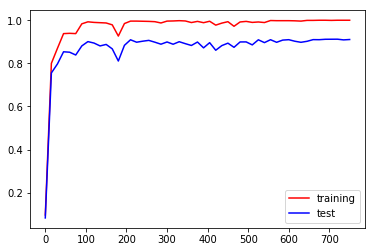

In [8]:
plt.plot(overfitting_log['accuracy_train_itr'], overfitting_log['accuracy_train'], 'r', label='training')
plt.plot(overfitting_log['accuracy_test_itr'], overfitting_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()

There are about 9% of differences between training and test accuracy. The gap isn't filled even though running the training for a while.

## L2 Regularization

L2 regularization add the regularization term to the loss function, which penalizes large values in weight matrices. It reduces the respresentational capability of a network, thus prevent overfitting.

The new loss function with L2 regularization is defined as followings:

$$
J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}, \ldots, W^{[L]}, b^{[L]}) = \
    \frac{1}{m} \sum_{i=1}^{m} L(y^{(i)}, t^{(i)}) + \
    \frac{\lambda}{2}\sum_{l=1}^{L} || W^{[l]} ||^2_F
$$

where $\frac{\lambda}{2}\sum_{l=1}^{L} || W^{[l]} ||^2_F$ is the regularization term, and $\lambda$ is a regularization hyperparameter.

$|| W^{[l]} ||^2_F$ is called frobenius norm of a matrix, and defined as below:

$$
|| W^{[l]} ||^2_F = \sum_{i=1}^{n^{[l-1]}} \sum_{j=1}^{n^{[l]}} (W_{ij}^{[l]})^2
$$

Due to the addition of the regularization term, the derivative of each weight matrix with respect to the loss function is 

$$
\frac{\partial J}{\partial W^{[l]}} = (backprop term) + \lambda W^{[l]}
$$

In [17]:
l2_reg_log = pickle.load(open('code/08_techniques/08_06_regularizations/08_6_2_l2_regularization_log.pkl', "rb"))
train_acc = l2_reg_log["accuracy_train"][-1]
test_acc = l2_reg_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 0.703333333333
Test accuracy: 0.6796
Variance: 2.37333333333


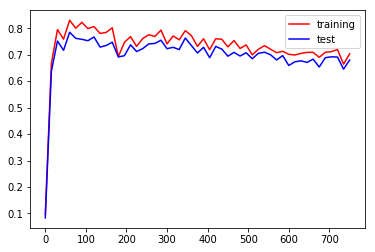

In [18]:
plt.plot(l2_reg_log['accuracy_train_itr'], l2_reg_log['accuracy_train'], 'r', label='training')
plt.plot(l2_reg_log['accuracy_test_itr'], l2_reg_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()

Using the L2 reguarization, variance is much reduced from 8.94% to 2.37%. It's also noteworthy that the training accuracy doesn't reach to 100%.

## Dropout

The dropout technique randomly shut off the activation of neurons. It turns out to be an effective regularization technique. The hyperparameter `keep_prob` decides how many neurons will be kept or shut off.

Inverted Dropout technique divides the activation by `keep_prob` to keep the calculation at test time easier. Also, we don't shut off any neurons at test time.

Improving neural networks by preventing co-adaptation of feature detectors [arXiv:1207.0580](https://arxiv.org/abs/1207.0580)

In [26]:
dropout_log = pickle.load(open('code/08_techniques/08_06_regularizations/08_6_3_dropout_log.pkl', "rb"))
train_acc = dropout_log["accuracy_train"][-1]
test_acc = dropout_log["accuracy_test"][-1]
print("Training accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Variance:", (train_acc - test_acc) * 100)

Training accuracy: 0.806666666667
Test accuracy: 0.759
Variance: 4.76666666667


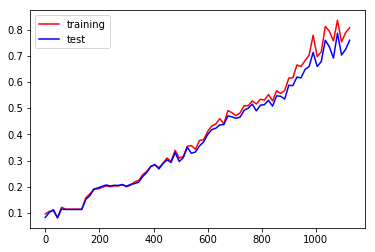

In [27]:
plt.plot(dropout_log['accuracy_train_itr'], dropout_log['accuracy_train'], 'r', label='training')
plt.plot(dropout_log['accuracy_test_itr'], dropout_log['accuracy_test'], 'b', label='test')
plt.legend()
plt.show()